## Simulation Results

Two sets of simulations:

1. **First Set of Simulations**:
    - Trails: Three (Beta: 0.1, 0.5, 0.9)
    - Parameters:
        - Large size factor: 0.3
        - Batch size: 30
        - Temperature: 0.5
    

2. **Second Set of Simulations**:
    - Trails: Five (Beta: 0.1, 0.5, 0.9)
    - Parameters:
        - Large size factor: 0.05
        - Batch size: 30
        - Temperature: 0.5

In [2]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from collections import Counter
import anndata as ad
import seaborn as sns
import pandas as pd
from sklearn.metrics import calinski_harabasz_score

In [3]:
input_dir = "/Users/apple/Desktop/KB/data/feat_simulation"
output_dir = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/out/plot/feat_simulation"
num_top_lg_toplot = 5

#simulation data
adata_01 = ad.read_h5ad('/Users/apple/Desktop/KB/data/LarryData/Larry_simulation/Larry_Simulation_01.h5ad')
lineage_label_01 = adata_01.obs["clone_id"].to_numpy()

adata_03 = ad.read_h5ad('/Users/apple/Desktop/KB/data/LarryData/Larry_simulation/Larry_Simulation_03.h5ad')
lineage_label_03 = adata_03.obs["clone_id"].to_numpy()

adata_05 = ad.read_h5ad('/Users/apple/Desktop/KB/data/LarryData/Larry_simulation/Larry_Simulation_05.h5ad')
lineage_label_05 = adata_05.obs["clone_id"].to_numpy()

adata_07 = ad.read_h5ad('/Users/apple/Desktop/KB/data/LarryData/Larry_simulation/Larry_Simulation_07.h5ad')
lineage_label_07 = adata_07.obs["clone_id"].to_numpy()

adata_09 = ad.read_h5ad('/Users/apple/Desktop/KB/data/LarryData/Larry_simulation/Larry_Simulation_09.h5ad')
lineage_label_09 = adata_09.obs["clone_id"].to_numpy()

# set 1
x_03_01 = np.load(input_dir+"/feat_710_bs30_sf03_temp05_sim01/scBaseEncoderFeat_Z_bs30_tau0.5.npy")
x_03_05 = np.load(input_dir+"/feat_710_bs30_sf03_temp05_sim05/scBaseEncoderFeat_Z_bs30_tau0.5.npy")
x_03_09 = np.load(input_dir+"/feat_710_bs30_sf03_temp05_sim09/scBaseEncoderFeat_Z_bs30_tau0.5.npy")

#set 2
x_005_01 = np.load(input_dir+"/feat_712_sf0.05_bs30_temp0.5_sim01/scBaseEncoderFeat_Z_bs30_tau0.5.npy")
x_005_03 = np.load(input_dir+"/feat_712_sf0.05_bs30_temp0.5_sim03/scBaseEncoderFeat_Z_bs30_tau0.5.npy")
x_005_05 = np.load(input_dir+"/feat_712_sf0.05_bs30_temp0.5_sim05/scBaseEncoderFeat_Z_bs30_tau0.5.npy")
x_005_07 = np.load(input_dir+"/feat_712_sf0.05_bs30_temp0.5_sim07/scBaseEncoderFeat_Z_bs30_tau0.5.npy")
x_005_09 = np.load(input_dir+"/feat_712_sf0.05_bs30_temp0.5_sim09/scBaseEncoderFeat_Z_bs30_tau0.5.npy")


### Calinski Scores

In [4]:
# set 1
score_03_01 = calinski_harabasz_score(x_03_01, lineage_label_01)
score_03_05 = calinski_harabasz_score(x_03_05, lineage_label_05)
score_03_09 = calinski_harabasz_score(x_03_09, lineage_label_09)

# set 2
score_005_01 = calinski_harabasz_score(x_005_01, lineage_label_01)
score_005_03 = calinski_harabasz_score(x_005_03, lineage_label_03)
score_005_05 = calinski_harabasz_score(x_005_05, lineage_label_05)
score_005_07 = calinski_harabasz_score(x_005_07, lineage_label_07)
score_005_09 = calinski_harabasz_score(x_005_09, lineage_label_09)

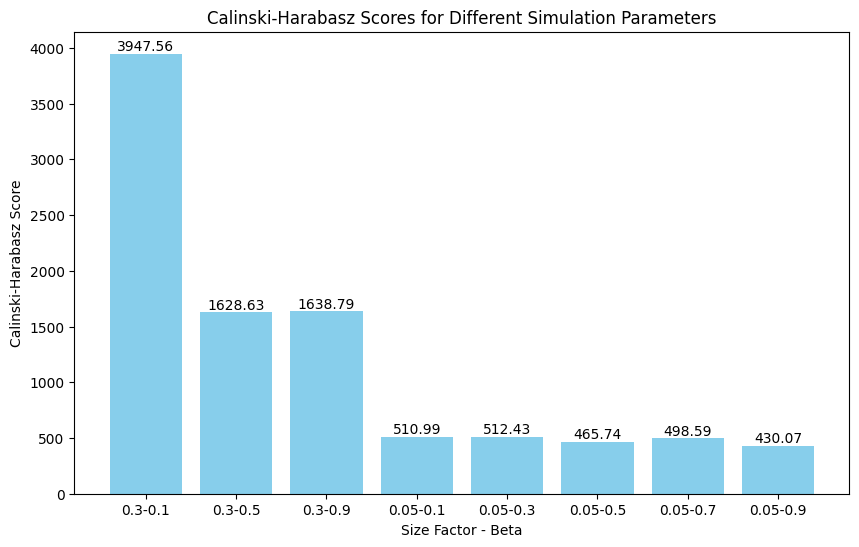

In [5]:
# Combine the scores
scores = [score_03_01, score_03_05, score_03_09, score_005_01, score_005_03, score_005_05, score_005_07, score_005_09]
labels = ['0.3-0.1', '0.3-0.5', '0.3-0.9', '0.05-0.1', '0.05-0.3', '0.05-0.5', '0.05-0.7', '0.05-0.9']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, scores, color='skyblue')

# Adding the scores on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Size Factor - Beta')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Scores for Different Simulation Parameters')
plt.show()

### UMAP plot

UMAP plot function

In [6]:
def plot_top_lineages(data, adata_subset, num_top_lg_toplot=20, output_path=None):
    """
    Plots the UMAP embedding of the top 20 largest lineages with different colors.
    
    Parameters:
        data (np.ndarray): The input data matrix.
        adata_subset (anndata.AnnData): The AnnData object containing cell annotations.
        num_top_lg_toplot (int): The number of top lineages to plot. Default is 20.
        output_path (str): Path to save the plot. If None, the plot will not be saved.
    
    Returns:
        None
    """
    labels = adata_subset.obs["clone_id"].to_numpy()
    categories = adata_subset.obs['Cell type annotation'].to_numpy()

    # Initialize UMAP and fit the data
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(data)

    # Determine the top lineages
    unique_labels, counts = np.unique(labels, return_counts=True)
    top_lineages = unique_labels[np.argsort(-counts)[:num_top_lg_toplot]]

    # Define lineage to color mapping
    colors = sns.color_palette('husl', len(top_lineages))
    lineage_to_color = dict(zip(top_lineages, colors))

    default_color = 'gray'

    plt.figure(figsize=(12, 8))

    # Plot all other lineages first
    for label in np.unique(labels):
        if label not in top_lineages:
            subset = embedding[labels == label]
            sns.scatterplot(x=subset[:, 0], y=subset[:, 1], color=default_color, s=1, alpha=0.2)

    # Plot the top lineages with different colors
    for i, lineage in enumerate(top_lineages):
        subset = embedding[labels == lineage]
        subset_categories = categories[labels == lineage]
        sns.scatterplot(x=subset[:, 0], y=subset[:, 1], color=lineage_to_color[lineage], s=25, alpha=1, label=f'{lineage}')

    plt.title(f'UMAP for Cells with Top {num_top_lg_toplot} Largest Lineages Highlighted')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')

    # Create a legend for the top lineages
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title="Lineages", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=2)

    if output_path:
        plt.savefig(output_path, dpi=300)
    plt.show()

# Example usage:
# data = np.load(input_dir + '/feat_713_colab/scBaseEncoderFeat_Z_bs100_tau0.5.npy')
# adata_subset = ad.read_h5ad(input_dir + '/LarryData/Larry_41201_2000.h5ad')
# plot_top_lineages(data, adata_subset, num_top_lg_toplot=20, output_path=output_dir + '/cell_umap_top_20_largest_plot.png')


#### Set 1

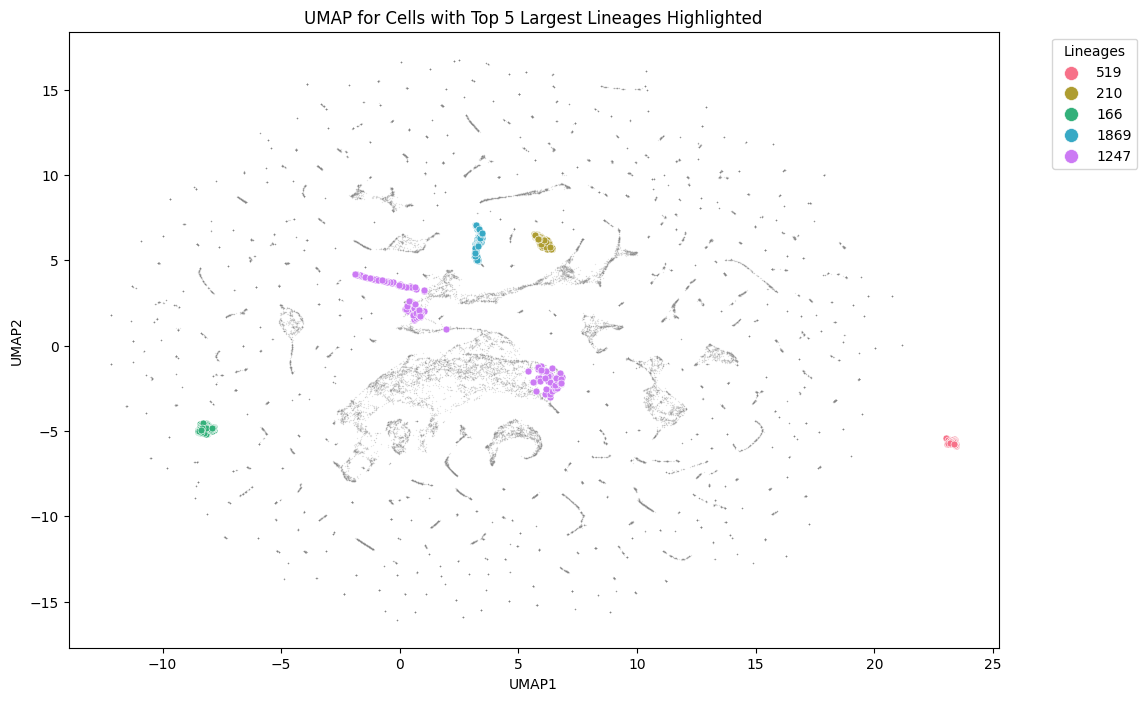

In [7]:
plot_top_lineages(x_03_01, adata_01, num_top_lg_toplot=5)


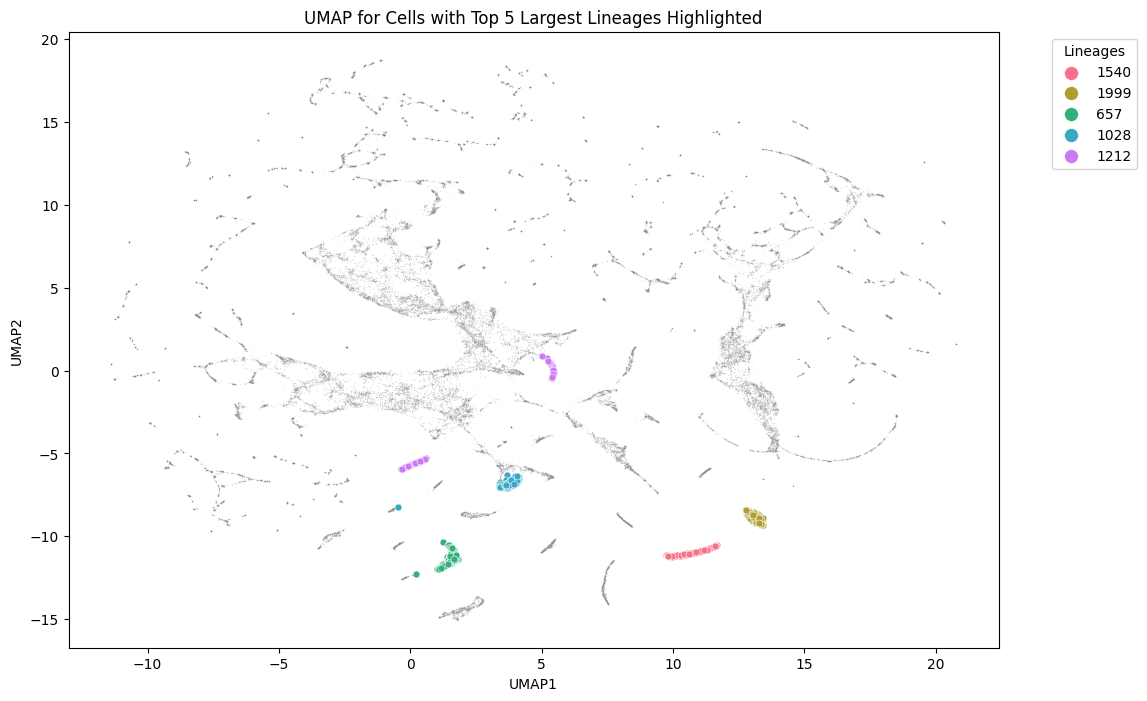

In [8]:
plot_top_lineages(x_03_05, adata_05, num_top_lg_toplot=5)


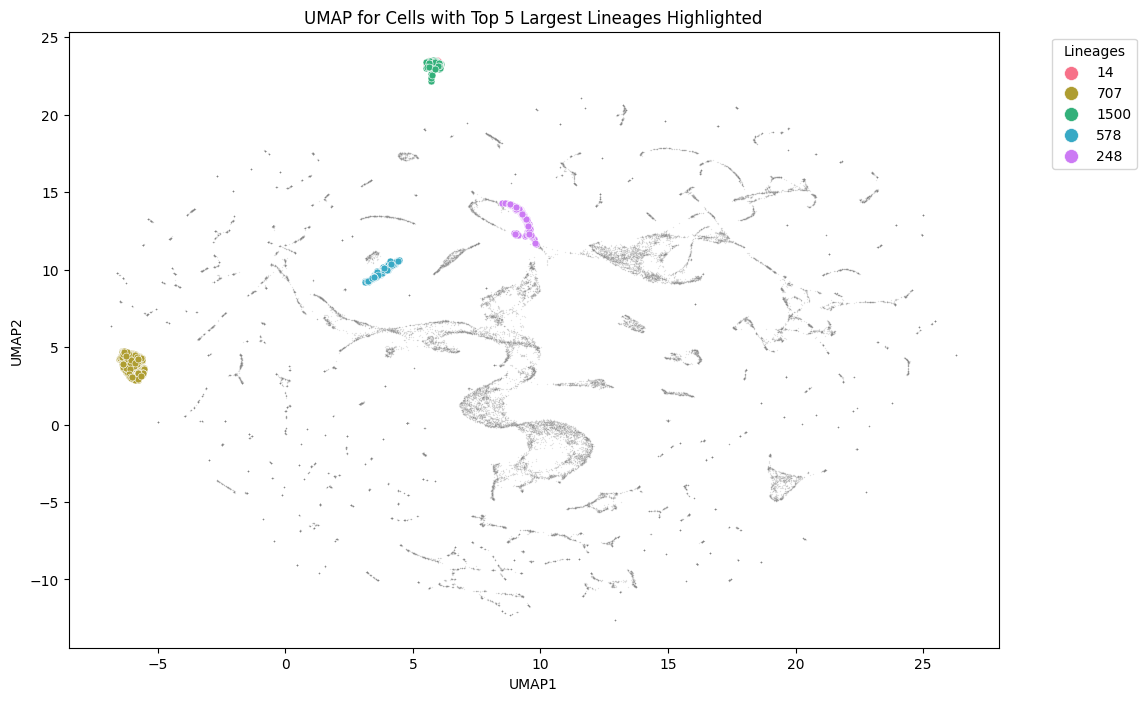

In [9]:
plot_top_lineages(x_03_09, adata_09, num_top_lg_toplot=5)

#### Set 2

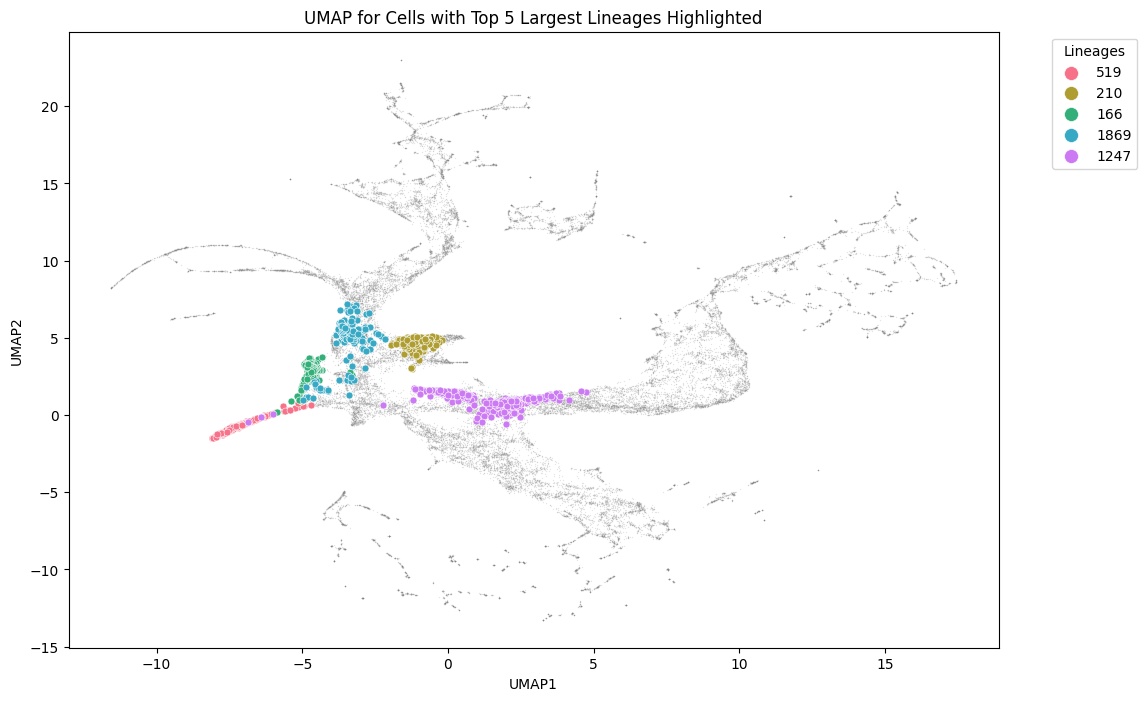

In [10]:
plot_top_lineages(x_005_01, adata_01, num_top_lg_toplot=5)


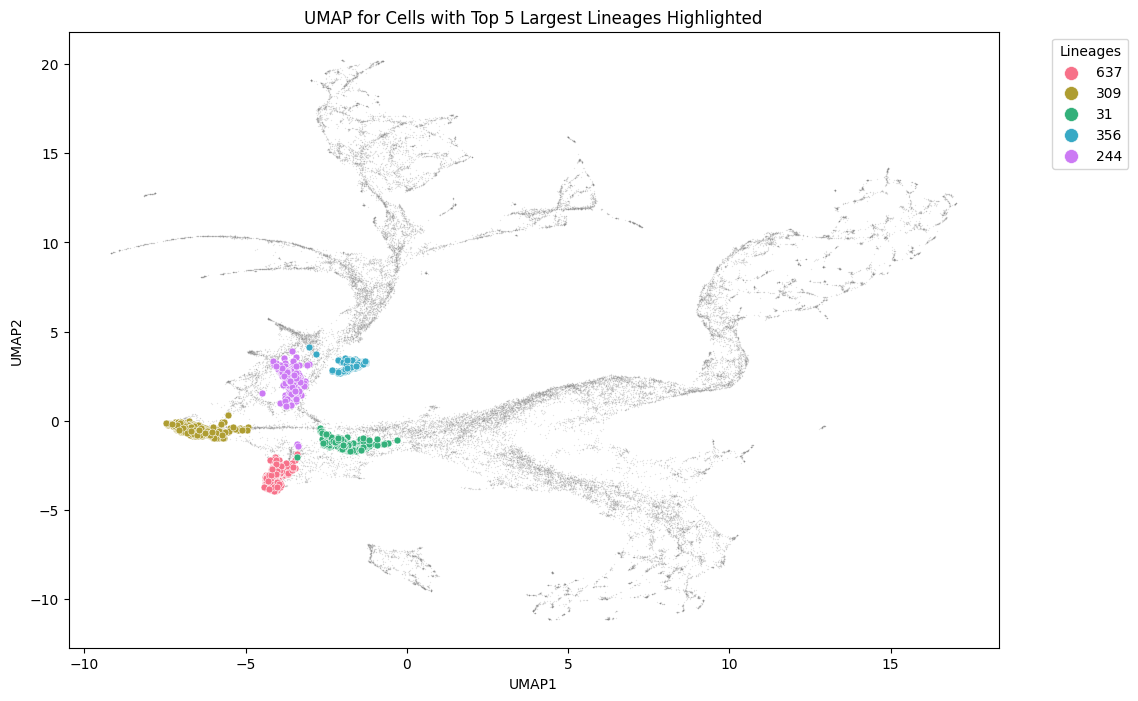

In [11]:
plot_top_lineages(x_005_03, adata_03, num_top_lg_toplot=5)

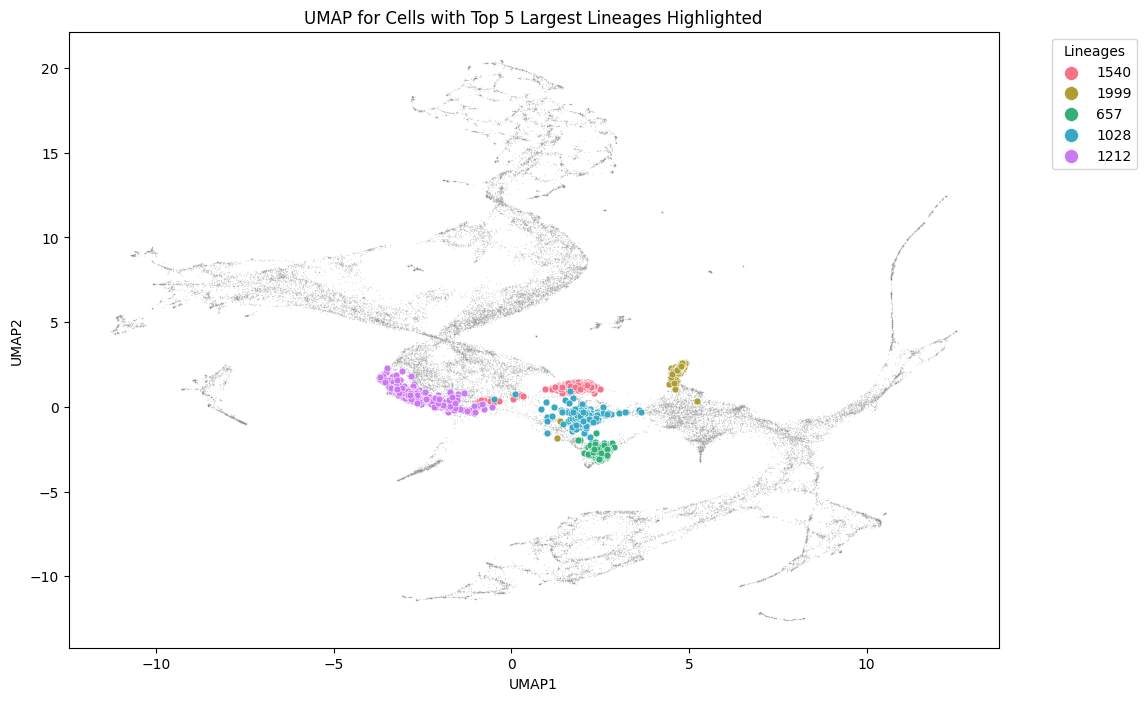

In [12]:
plot_top_lineages(x_005_05, adata_05, num_top_lg_toplot=5)

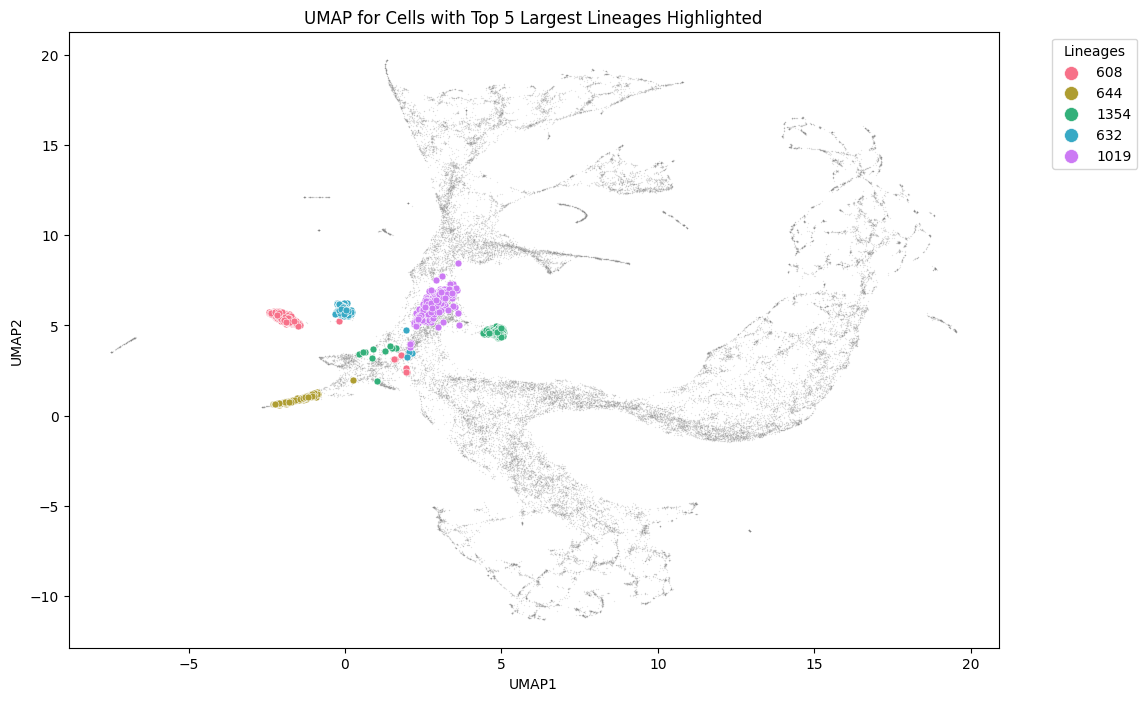

In [13]:
plot_top_lineages(x_005_07, adata_07, num_top_lg_toplot=5)


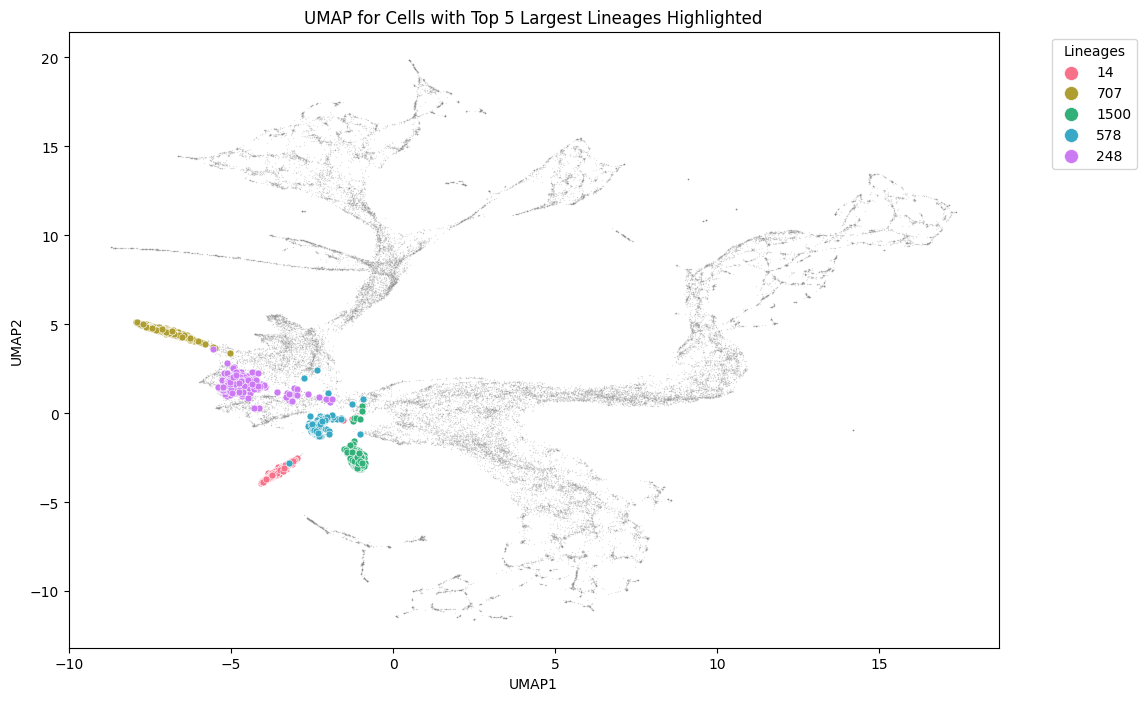

In [14]:
plot_top_lineages(x_005_09, adata_09, num_top_lg_toplot=5)